<a href="https://colab.research.google.com/github/jixuanlu/MAT494/blob/main/2.4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Large array

In [9]:
import numpy as np


In [10]:
# difference of python sum and numpy.sum

data = np.arange(1000)

%timeit sum(data)
%timeit np.sum(data)

10000 loops, best of 5: 160 µs per loop
The slowest run took 12.37 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 4.83 µs per loop


In [11]:
data = []
for i in range(1000):
    data.append(i)

%timeit sum(data)
%timeit np.sum(data)

100000 loops, best of 5: 7.18 µs per loop
10000 loops, best of 5: 99.8 µs per loop


2.4 Maximum Likelihood Estimation
Maximum likelihood estimation is an effective approach of estimating the parameters of a probability distribution through maximizing a likelihood function. The point in the parameter space that maximizes the likelihood function is called the maximum likelihood estimate.

Let  X1,X2,...,Xn  have joint pmf or pdf  f(x1,x2,...,xn;θ1,...,θm)  where the parameters  θ1,...,θm  have unknown values. When  x1,x2,...,xn  are the observed sample values then  f(x1,x2,...,xn;θ1,...,θm)  is a function of  θ1,...,θm  and is called the likelihood function, which we want to maximize.

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import scipy.stats as stats
import pymc3 as pm3
# import numdifftools as ndt
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


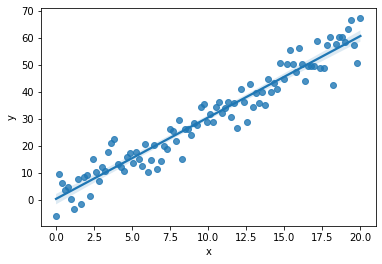

In [5]:
# normally distributed randomized data
n = 100
x = np.linspace(0, 20, n)
e = np.random.normal(loc = 0.0, scale = 5.0, size = n)
y = 3*x + e

df = pd.DataFrame({'y':y, 'x':x})
df['constant'] = 1

sns.regplot(df.x, df.y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
# OLS gives us a benchmark to compare MLE to
X = df[['constant', 'x']]
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     1314.
Date:                Mon, 27 Sep 2021   Prob (F-statistic):           1.41e-58
Time:                        04:04:36   Log-Likelihood:                -298.80
No. Observations:                 100   AIC:                             601.6
Df Residuals:                      98   BIC:                             606.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       0.3639      0.963      0.378      0.706      -1.547       2.275
x              3.0153      0.083     36.249      0.000       2.850       3.180
==============================================================================
Omnibus:                        0.935   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.627   Jarque-Bera (JB):                1.008
Skew:                          -0.218   Prob(JB):                        0.604
Kurtosis:                       2.771   Cond. No.                         23.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# likelihood function
def MLERegression(params):
  intercept, beta, sd = params[0], params[1], params[2] # these are guesses at parameters
  yhat = intercept + beta*x # predicting ground truth function
  negLL = -np.sum(stats.norm.logpdf(y, loc = yhat, scale = sd))
  return negLL

In [8]:
guess = np.array([3, 3, 3])
results = minimize(MLERegression, guess, method = 'Nelder-Mead', options={'disp' : True})
results_df = pd.DataFrame({'coef':results['x']})
results_df.index = ['constant', 'x', 'sigma']
results_df.head(2)

Optimization terminated successfully.
         Current function value: 298.799846
         Iterations: 82
         Function evaluations: 150


,coef
constant,0.363951
x,3.015303
